# Carregando Bibliotecas

In [1]:
!gdown 1CoTy1ZnYZqsKWUgjM353KVLqJtTLWo-v

Downloading...
From: https://drive.google.com/uc?id=1CoTy1ZnYZqsKWUgjM353KVLqJtTLWo-v
To: /content/nba_stats.csv
100% 3.50M/3.50M [00:00<00:00, 190MB/s]


In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb

# Carregando o DATASET

In [3]:
df = pd.read_csv('nba_stats.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head(30)

year            name  playerId      playerSlug positionId teamId  \
0   1999   Allen Iverson       366   allen-iverson         SG    PHI   
1   2000   Allen Iverson       366   allen-iverson         SG    PHI   
2   2001   Allen Iverson       366   allen-iverson         SG    PHI   
3   2002   Allen Iverson       366   allen-iverson         SG    PHI   
4   2003   Allen Iverson       366   allen-iverson         SG    PHI   
5   2004   Allen Iverson       366   allen-iverson         SG    PHI   
6   2005   Allen Iverson       366   allen-iverson         SG    PHI   
7   2006   Allen Iverson       366   allen-iverson         SG    PHI   
8   2007   Allen Iverson       366   allen-iverson         SG    DEN   
9   2008   Allen Iverson       366   allen-iverson         SG    DEN   
10  2009   Allen Iverson       366   allen-iverson         SG    DET   
11  2010   Allen Iverson       366   allen-iverson         SG    PHI   
12  1999      Jason Kidd       429      jason-kidd         PG    PHX   
13  2000      Jason Kidd       429      jason-kidd         PG    PHX   
14  2001      Jason Kidd       429      jason-kidd         PG    PHX   
15  2002      Jason Kidd       429      jason-kidd         PG     NJ   
16  2003      Jason Kidd       429      jason-kidd         PG     NJ   
17  2005      Jason Kidd       429      jason-kidd         PG     NJ   
18  2006      Jason Kidd       429      jason-kidd         PG     NJ   
19  2007      Jason Kidd       429      jason-kidd         PG     NJ   
20  2008      Jason Kidd       429      jason-kidd         PG    DAL   
21  2009      Jason Kidd       429      jason-kidd         PG    DAL   
22  2010      Jason Kidd       429      jason-kidd         PG    DAL   
23  2011      Jason Kidd       429      jason-kidd         PG    DAL   
24  2000  Michael Finley       242  michael-finley         SG    DAL   
25  2001  Michael Finley       242  michael-finley         SG    DAL   
26  2002  Michael Finley       242  michael-finley         SG    DAL   
27  2003  Michael Finley       242  michael-finley         SG    DAL   
28  2004  Michael Finley       242  michael-finley         SG    DAL   
29  2005  Michael Finley       242  michael-finley         SG    DAL   

      status  gamesPlayed  avgMinutes  avgFouls  flagrantFouls  \
0   inactive         48.0   41.458332  2.041667            0.0   
1   inactive         70.0   40.757140  2.314286            0.0   
2   inactive         71.0   41.957745  2.070423            0.0   
3   inactive         60.0   43.700000  1.700000            0.0   
4   inactive         82.0   42.500000  1.817073            0.0   
5   inactive         48.0   42.500000  1.812500            0.0   
6   inactive         75.0   42.320000  1.866667            0.0   
7   inactive         72.0   43.097220  1.680556            0.0   
8   inactive         65.0   42.476925  1.461538            0.0   
9   inactive         82.0   41.756096  1.329268            0.0   
10  inactive         57.0   36.719300  1.508772            0.0   
11  inactive         28.0   30.892857  1.714286            0.0   
12  inactive         50.0   41.200000  2.160000            0.0   
13  inactive         67.0   39.044777  2.208955            0.0   
14  inactive         77.0   39.805195  2.220779            0.0   
15  inactive         82.0   37.268290  1.658537            0.0   
16  inactive         80.0   37.362500  1.587500            0.0   
17  inactive         66.0   36.893940  1.666667            0.0   
18  inactive         80.0   37.187500  1.962500            0.0   
19  inactive         80.0   36.662500  1.825000            0.0   
20  inactive         80.0   36.325000  2.062500            0.0   
21  inactive         81.0   35.629630  2.074074            1.0   
22  inactive         80.0   36.012500  1.775000            0.0   
23  inactive         80.0   33.162500  1.487500            0.0   
24  inactive         82.0   42.243904  2.085366            0.0   
25  inactive         82.0   41.987804  2.121951        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

In [6]:
df['positionId'].value_counts()

C     1530
PF    1422
SG    1261
PG    1214
SF    1191
G      786
F      751
GF       1
Name: positionId, dtype: int64

In [7]:
df['salary'].value_counts()

$854,389       110
$3,000,000      81
$4,000,000      78
$5,000,000      76
$1,620,564      54
              ... 
$17,190,000      1
$3,254,880       1
$3,841,920       1
$4,404,629       1
$3,350,760       1
Name: salary, Length: 4345, dtype: int64

# Funções

In [8]:
# Função para formatar os rótulos do eixo y com cifrão e formatação
def formatar_salario(value, tick_number):
    return f'${value:,.0f}'


# Limpando as posições

In [9]:
df["salary_num"] = (
    df["salary"]
    .astype(str)
    .str.replace(r"\$|,", "", regex=True)
    .astype(np.int64)
)

In [10]:
df = df[df['positionId'] != 'GF']

In [11]:
df['positionId'].value_counts()

C     1530
PF    1422
SG    1261
PG    1214
SF    1191
G      786
F      751
Name: positionId, dtype: int64

In [12]:
# Contar a quantidade de NaN na coluna 'positionId'
count_nan_positionId = df['positionId'].isna().sum()
print("Quantidade de NaN na coluna 'positionId':", count_nan_positionId)

Quantidade de NaN na coluna 'positionId': 6


In [13]:
# Remover linhas onde 'positionId' é NaN
df.dropna(subset=['positionId'], inplace=True)

<ipython-input-13-60f2f31340af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['positionId'], inplace=True)


In [14]:
df['positionId'].value_counts()

C     1530
PF    1422
SG    1261
PG    1214
SF    1191
G      786
F      751
Name: positionId, dtype: int64

# ANÁLISE EXPLORATÓRIA DOS DADOS

<Axes: xlabel='positionId'>

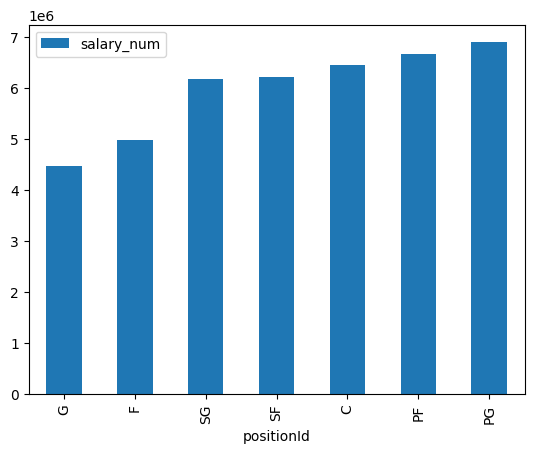

In [15]:
df[["positionId", "salary_num"]].groupby(["positionId"]).mean().sort_values(
    by="salary_num"
).plot(kind="bar")

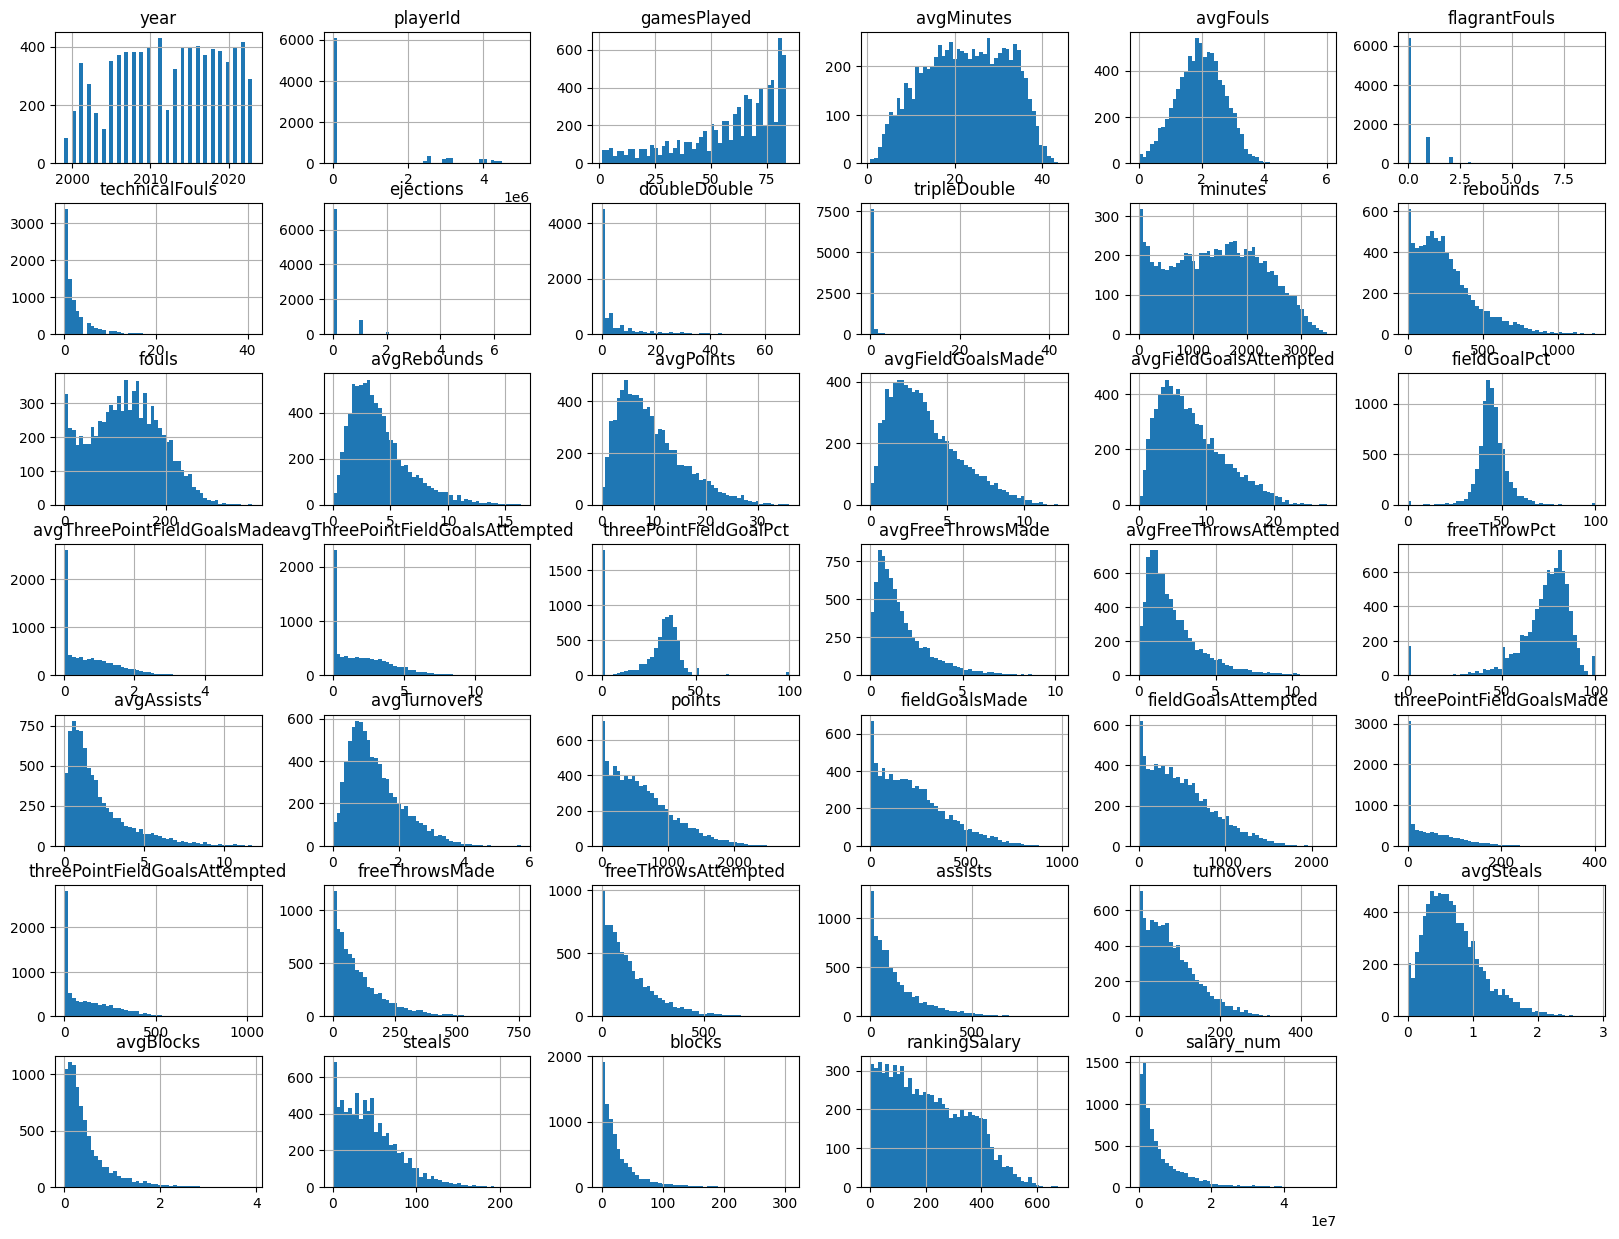

In [16]:
g = df.hist(bins = 50, figsize = (20, 15))

In [17]:
# Verifique se existem valores nulos ou ausentes
# Verificação de valores nulos por coluna
valores_nulos = df.isna().sum()
columns_with_nan = valores_nulos[valores_nulos > 0].index
print(columns_with_nan)

Index(['college', 'draftinfo', 'birthplace', 'team', 'htwt', 'experience'], dtype='object')


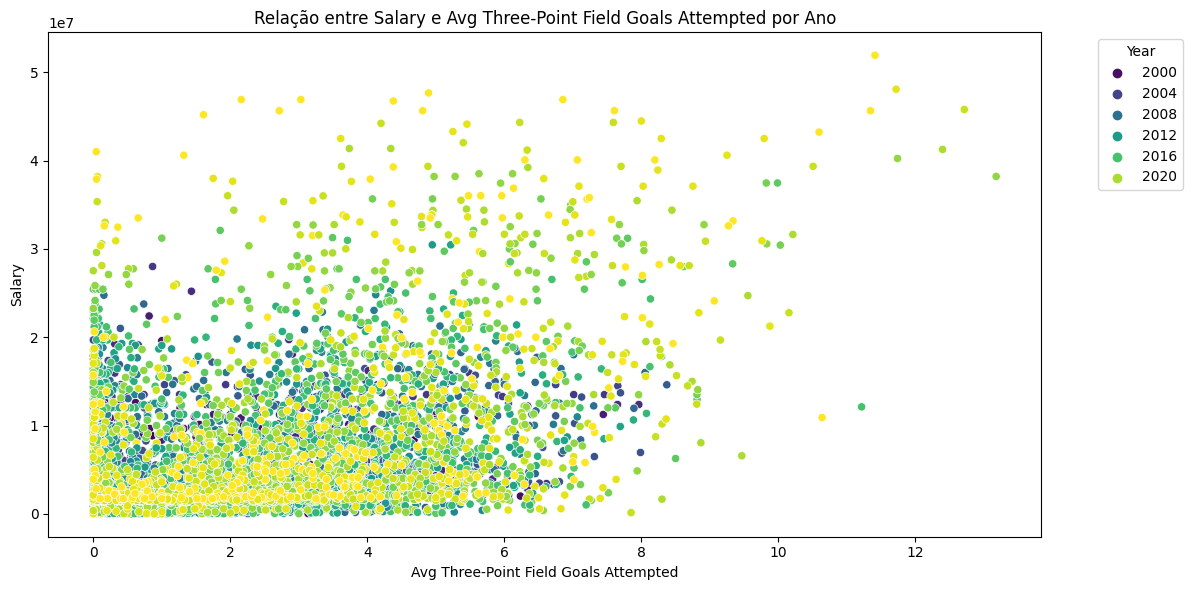

In [18]:
# Gráfico de dispersão: salary_num vs. avgThreePointFieldGoalsAttempted por year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='avgThreePointFieldGoalsAttempted', y='salary_num', hue='year', palette='viridis')
plt.xlabel('Avg Three-Point Field Goals Attempted')
plt.ylabel('Salary')
plt.title('Relação entre Salary e Avg Three-Point Field Goals Attempted por Ano')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

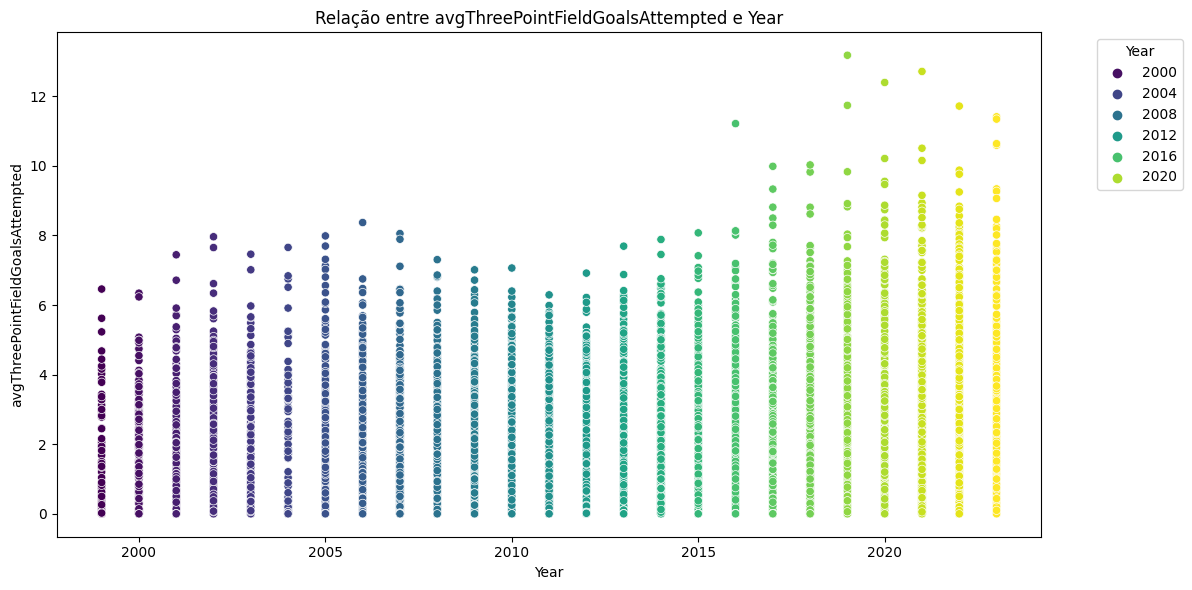

In [19]:
# Gráfico de dispersão: points vs. year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='avgThreePointFieldGoalsAttempted', hue='year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('avgThreePointFieldGoalsAttempted')
plt.title('Relação entre avgThreePointFieldGoalsAttempted e Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

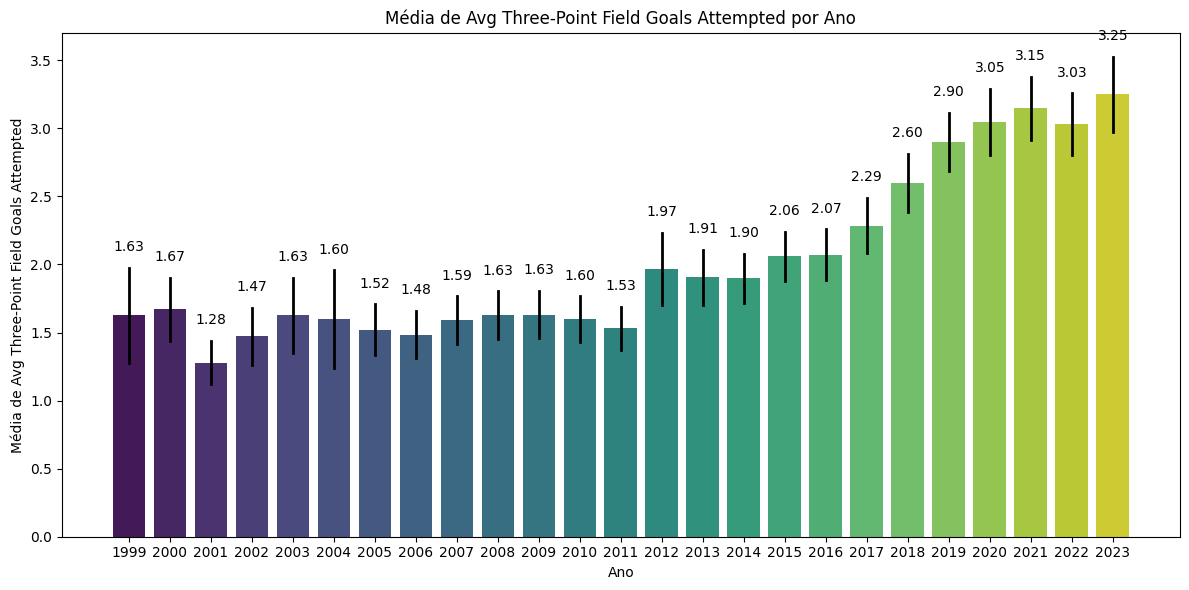

In [20]:
# Calcular a média e o intervalo de confiança de 'avgThreePointFieldGoalsAttempted' por ano
media_avg_three_point = df.groupby('year')['avgThreePointFieldGoalsAttempted'].agg(['mean', 'sem']).reset_index()
media_avg_three_point['ci_low'] = media_avg_three_point['mean'] - 1.96 * media_avg_three_point['sem']
media_avg_three_point['ci_high'] = media_avg_three_point['mean'] + 1.96 * media_avg_three_point['sem']

# Criar o gráfico de barras com intervalo de confiança
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=media_avg_three_point, x='year', y='mean', palette='viridis')

# Adicionar intervalo de confiança
for i in range(len(media_avg_three_point)):
    plt.plot([i, i], [media_avg_three_point['ci_low'][i], media_avg_three_point['ci_high'][i]], color='black', linewidth=2)

plt.xlabel('Ano')
plt.ylabel('Média de Avg Three-Point Field Goals Attempted')
plt.title('Média de Avg Three-Point Field Goals Attempted por Ano')

# Adicionar rótulos com os valores
for i in range(len(media_avg_three_point)):
    plt.text(i, media_avg_three_point['ci_high'][i] + 0.1, f'{media_avg_three_point["mean"][i]:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

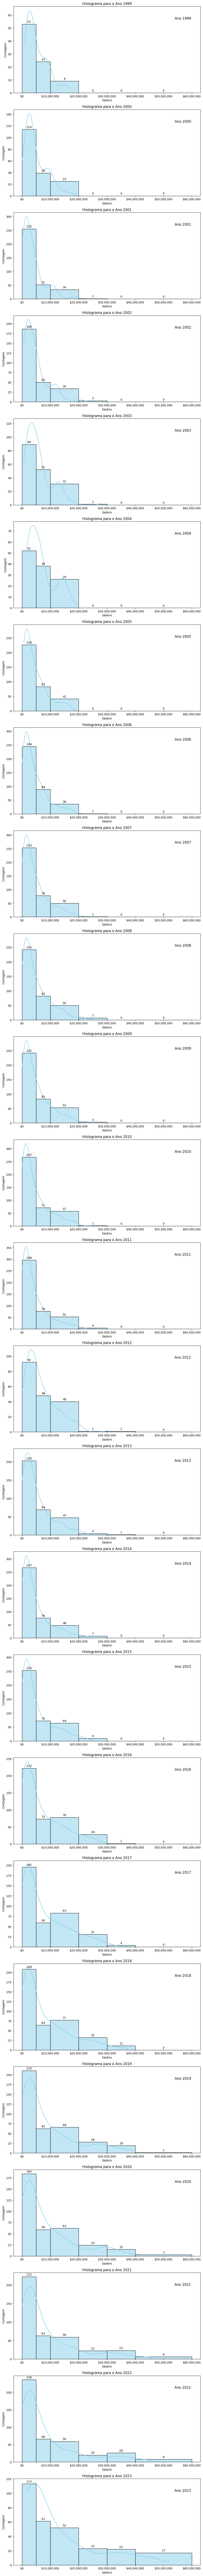

In [21]:
# Obter a lista única de anos no DataFrame
anos_unicos = df['year'].unique()

# Definir os limites das classes desejadas
classes_limites = [0, 5e6, 10e6, 20e6, 30e6, 40e6, 60e6]

# Criar subgráficos (um para cada ano)
fig, axes = plt.subplots(nrows=len(anos_unicos), figsize=(10, 5*len(anos_unicos)))

# Iterar sobre os anos e criar um histograma para cada ano
for i, ano in enumerate(anos_unicos):
    data_ano = df[df['year'] == ano]

    # Usar as classes definidas
    bin_edges = np.array(classes_limites)

    ax = axes[i]
    sns.histplot(data=data_ano, x='salary_num', bins=bin_edges, kde=True, ax=ax, color='skyblue')
    ax.set_xlabel('Salário')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Histograma para o Ano {ano}')

    # Adicionar rótulo com o ano
    ax.text(0.95, 0.85, f'Ano {ano}', transform=ax.transAxes, fontsize=12, ha='right')

    # Adicionar cifrão aos rótulos do eixo x
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x):,}'))

    # Adicionar rótulos com a contagem em cada barra
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height):,}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


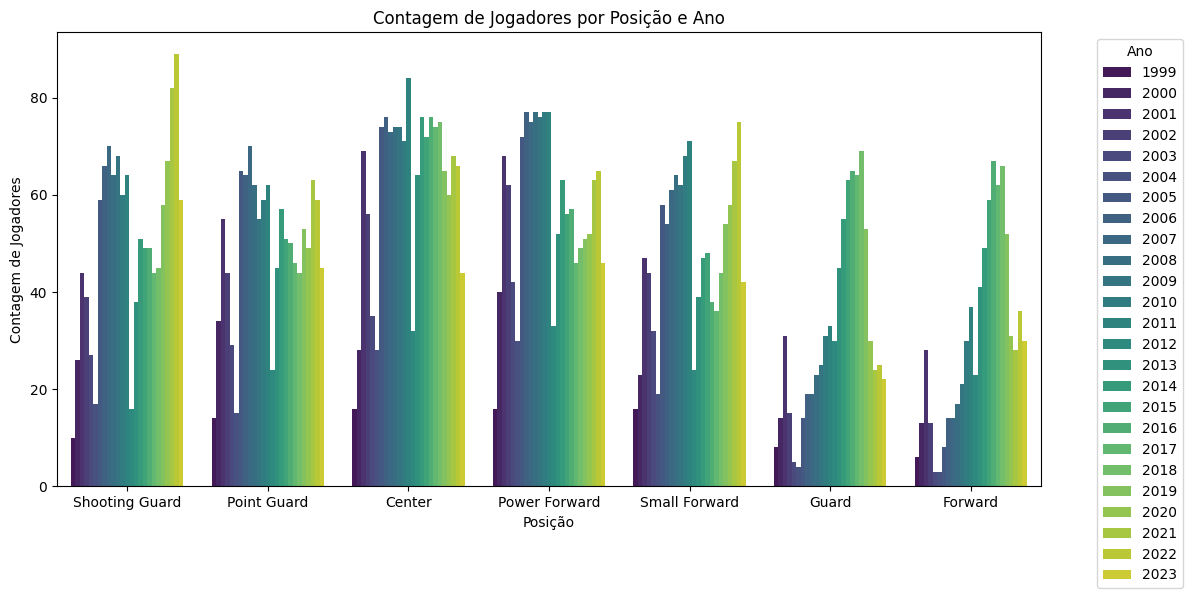

In [22]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='position', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Contagem de Jogadores')
plt.title('Contagem de Jogadores por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

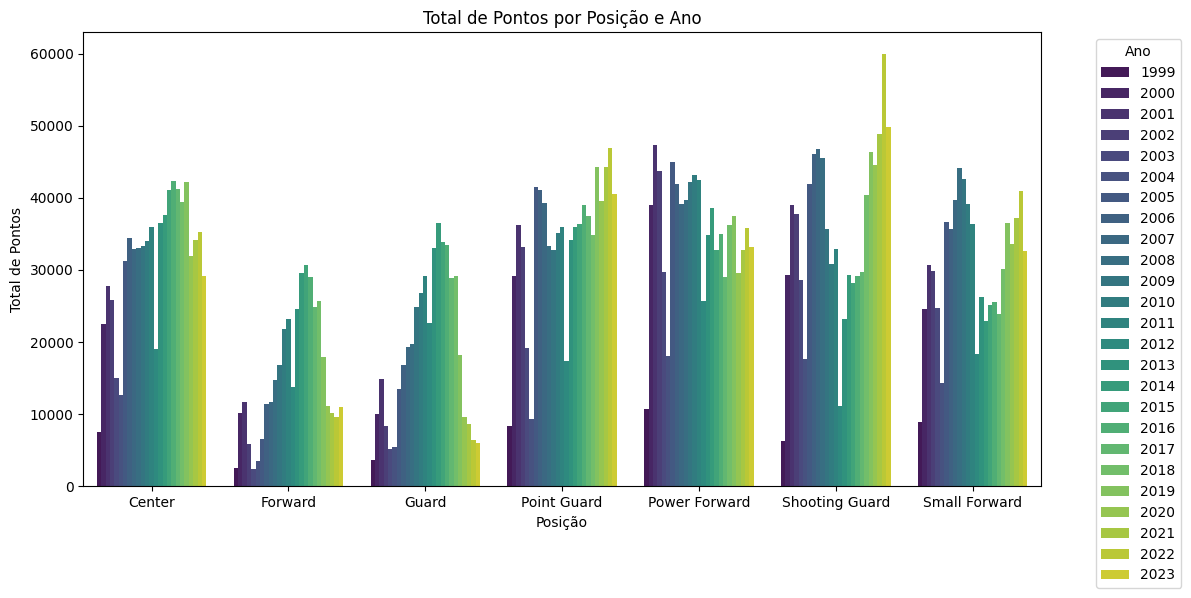

In [23]:
# Calcular a soma dos pontos por posição e por ano
pontos_por_posicao_ano = df.groupby(['position', 'year'])['points'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pontos_por_posicao_ano, x='position', y='points', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Total de Pontos')
plt.title('Total de Pontos por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

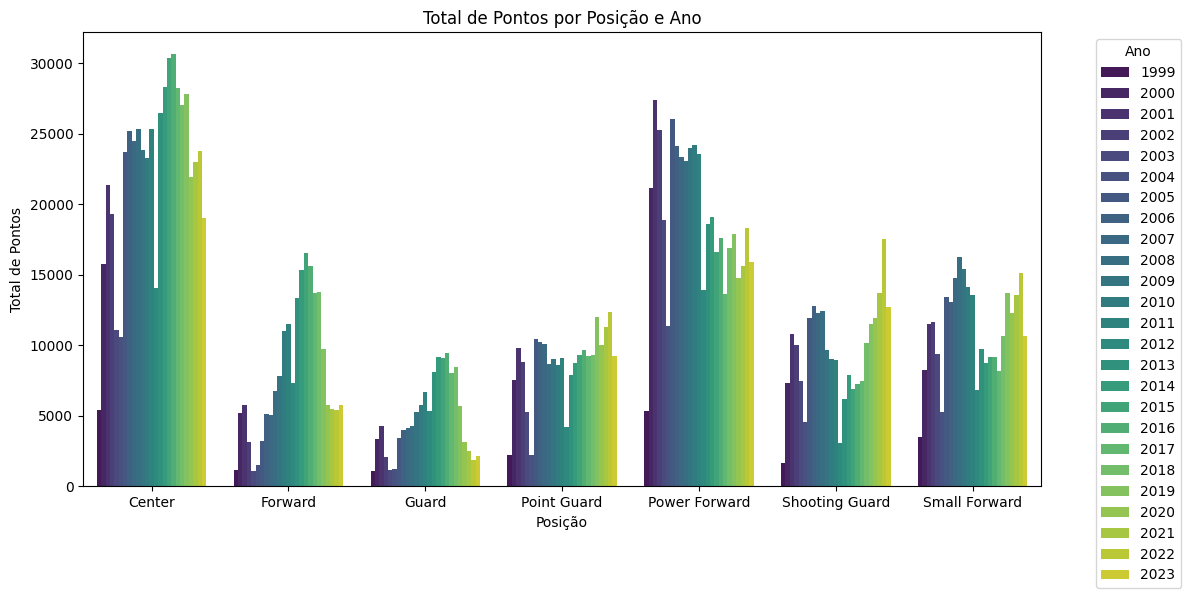

In [24]:
# Calcular a soma dos pontos por posição e por ano
pontos_por_posicao_ano = df.groupby(['position', 'year'])['rebounds'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pontos_por_posicao_ano, x='position', y='rebounds', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Total de Pontos')
plt.title('Total de Pontos por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

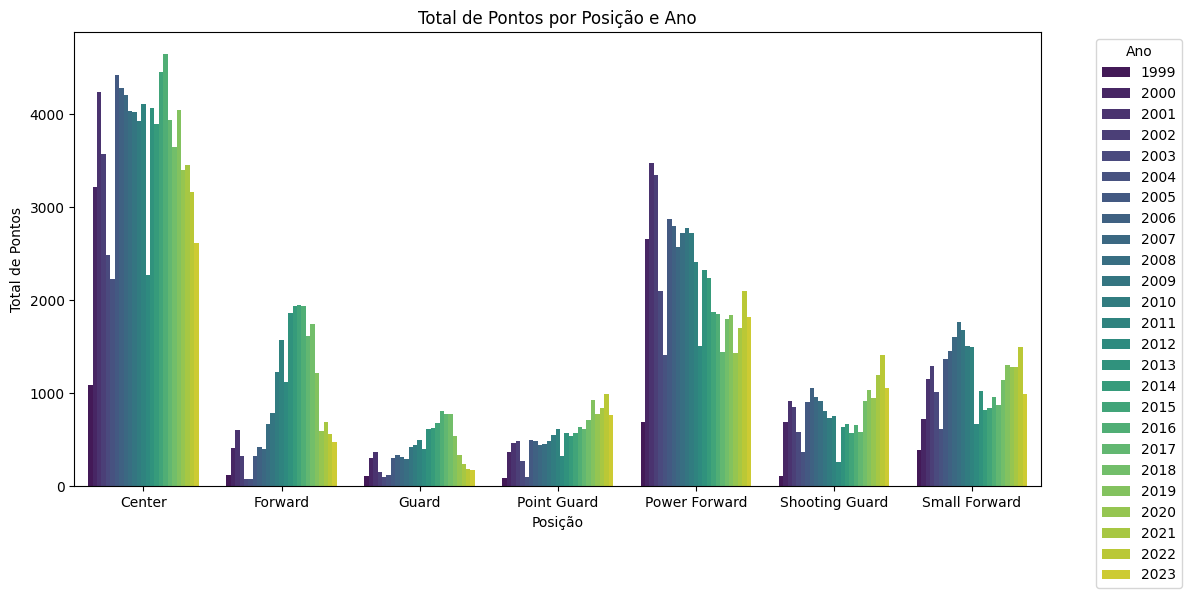

In [25]:
# Calcular a soma dos pontos por posição e por ano
pontos_por_posicao_ano = df.groupby(['position', 'year'])['blocks'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pontos_por_posicao_ano, x='position', y='blocks', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Total de Pontos')
plt.title('Total de Pontos por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

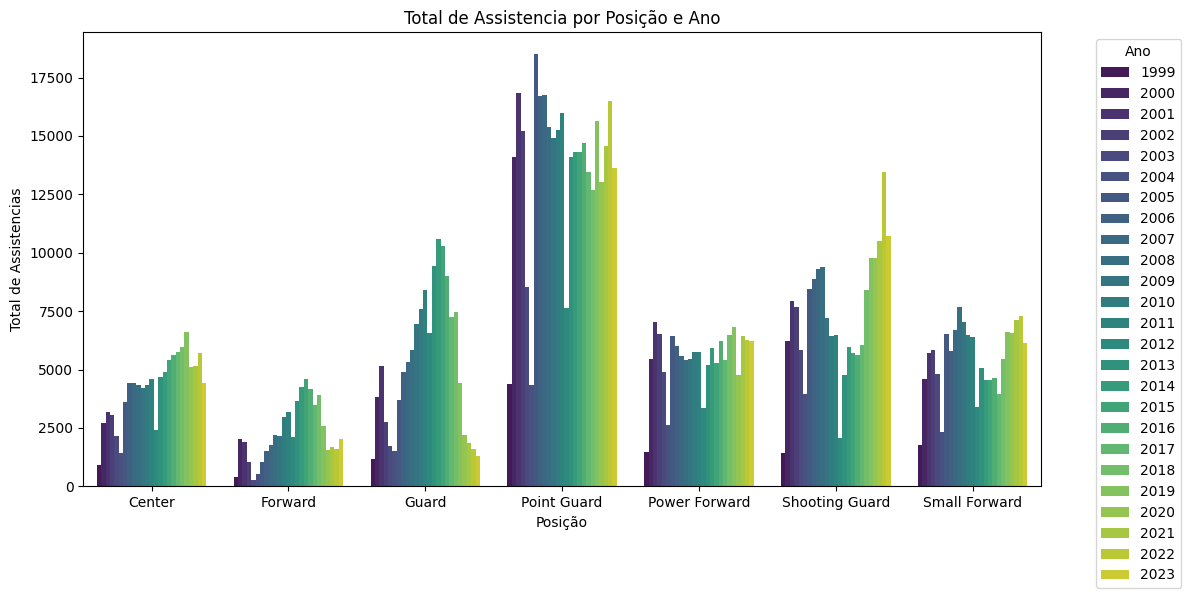

In [26]:
# Calcular a soma dos pontos por posição e por ano
pontos_por_posicao_ano = df.groupby(['position', 'year'])['assists'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pontos_por_posicao_ano, x='position', y='assists', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Total de Assistencias')
plt.title('Total de Assistencia por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

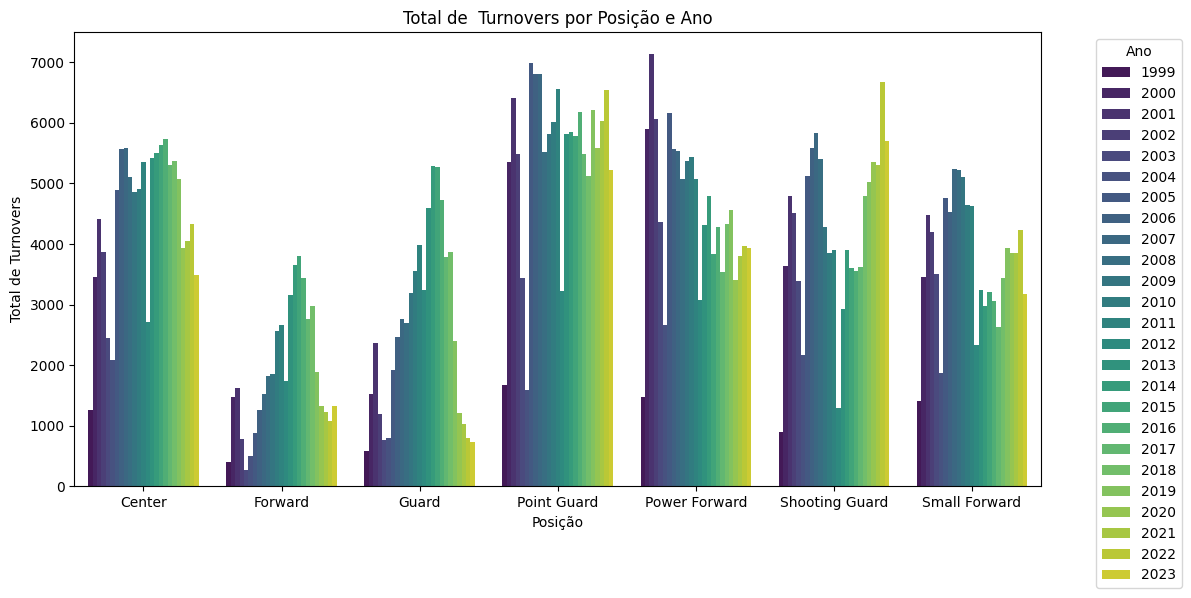

In [27]:
# Calcular a soma dos pontos por posição e por ano
pontos_por_posicao_ano = df.groupby(['position', 'year'])['turnovers'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=pontos_por_posicao_ano, x='position', y='turnovers', hue='year', palette='viridis')
plt.xlabel('Posição')
plt.ylabel('Total de Turnovers')
plt.title('Total de  Turnovers por Posição e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

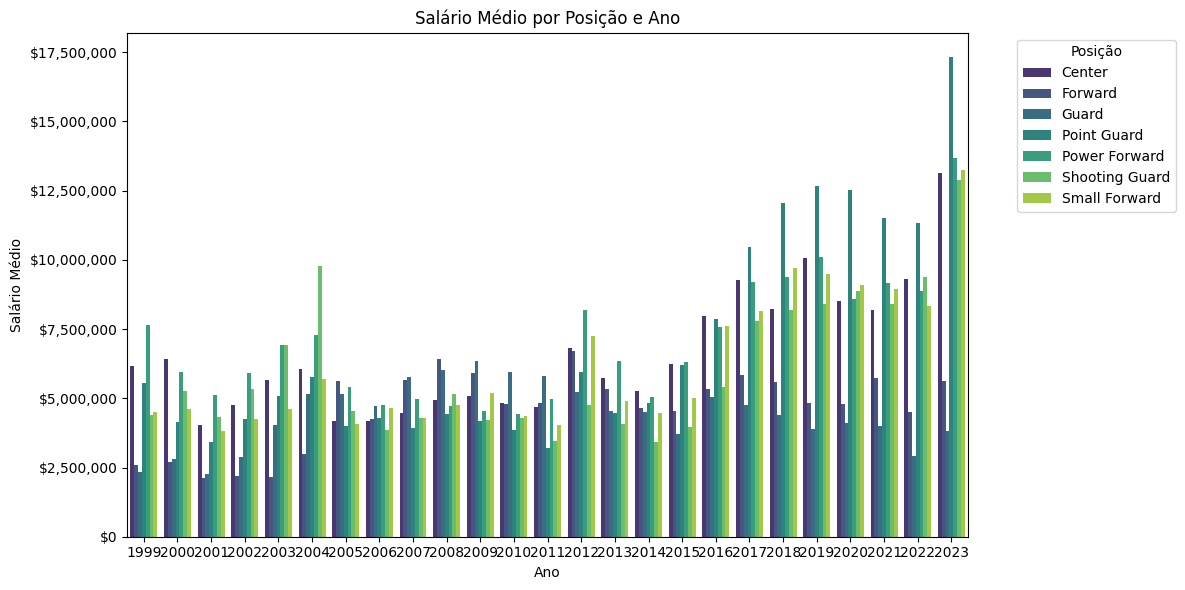

In [28]:
# Calcular a média dos salários por posição e por ano
salario_por_posicao_ano = df.groupby(['year', 'position'])['salary_num'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=salario_por_posicao_ano, x='year', y='salary_num', hue='position', palette='viridis')
plt.xlabel('Ano')
plt.ylabel('Salário Médio')
plt.title('Salário Médio por Posição e Ano')
plt.legend(title='Posição', bbox_to_anchor=(1.05, 1), loc='upper left')

# Função para formatar os rótulos do eixo y com cifrão e formatação
def formatar_salario(value, tick_number):
    return f'${value:,.0f}'

# Aplicar a função de formatação aos rótulos do eixo y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_salario))

plt.tight_layout()
plt.show()

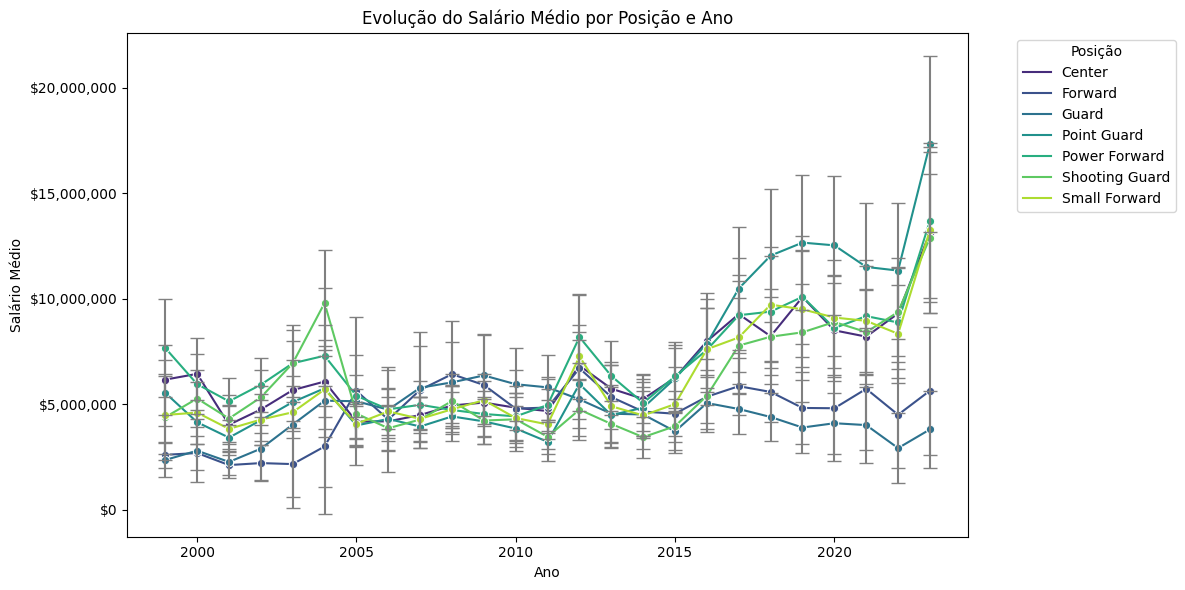

In [29]:
# Calcular a média e intervalo de confiança dos salários por posição e por ano
salario_por_posicao_ano = df.groupby(['year', 'position'])['salary_num'].agg(['mean', 'sem']).reset_index()

# Criar o gráfico de linha com intervalo de confiança
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=salario_por_posicao_ano, x='year', y='mean', hue='position', palette='viridis', marker='o')
ax.errorbar(x=salario_por_posicao_ano['year'], y=salario_por_posicao_ano['mean'], yerr=1.96*salario_por_posicao_ano['sem'], linestyle='None', color='grey', capsize=5)
plt.xlabel('Ano')
plt.ylabel('Salário Médio')
plt.title('Evolução do Salário Médio por Posição e Ano')
plt.legend(title='Posição', bbox_to_anchor=(1.05, 1), loc='upper left')

# Aplicar a função de formatação aos rótulos do eixo y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_salario))
plt.tight_layout()
plt.show()


# Preparando o Modelo

## Criando uma nova variável

In [30]:
df["pie_adaptado"] = (
    df["points"]
    + df["assists"]
    + df["rebounds"]
    + df["steals"]
    + df["blocks"]
    - df["turnovers"]
) / df["minutes"]
df.head(10)

year           name  playerId     playerSlug positionId teamId    status  \
0  1999  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
1  2000  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
2  2001  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
3  2002  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
4  2003  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
5  2004  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
6  2005  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
7  2006  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
8  2007  Allen Iverson       366  allen-iverson         SG    DEN  inactive   
9  2008  Allen Iverson       366  allen-iverson         SG    DEN  inactive   

   gamesPlayed  avgMinutes  avgFouls  flagrantFouls  technicalFouls  \
0         48.0   41.458332  2.041667            0.0             5.0   
1         70.0   40.757140  2.314286            0.0            12.0   
2         71.0   41.957745  2.070423            0.0            18.0   
3         60.0   43.700000  1.700000            0.0            12.0   
4         82.0   42.500000  1.817073            0.0             8.0   
5         48.0   42.500000  1.812500            0.0             7.0   
6         75.0   42.320000  1.866667            0.0            10.0   
7         72.0   43.097220  1.680556            0.0            13.0   
8         65.0   42.476925  1.461538            0.0            12.0   
9         82.0   41.756096  1.329268            0.0             5.0   

   ejections  doubleDouble  tripleDouble  minutes  rebounds  fouls  \
0        0.0           4.0           0.0   1990.0     236.0   98.0   
1        0.0           1.0           0.0   2853.0     267.0  162.0   
2        0.0           4.0           0.0   2979.0     273.0  147.0   
3        1.0           4.0           1.0   2622.0     269.0  102.0   
4        0.0           6.0           0.0   3485.0     344.0  149.0   
5        0.0           8.0           0.0   2040.0     178.0   87.0   
6        0.0          24.0           0.0   3174.0     299.0  140.0   
7        0.0          18.0           0.0   3103.0     232.0  121.0   
8        1.0          17.0           0.0   2761.0     193.0   95.0   
9        1.0          15.0           0.0   3424.0     243.0  109.0   

   avgRebounds  avgPoints  avgFieldGoalsMade  avgFieldGoalsAttempted  \
0     4.916666  26.750000           9.062500               22.000000   
1     3.814286  28.414286          10.414286               24.757143   
2     3.845070  31.084507          10.732394               25.535212   
3     4.483333  31.383333          11.083333               27.816668   
4     4.195122  27.585365           9.804878               23.658537   
5     3.708333  26.375000           9.062500               23.437500   
6     3.986667  30.693333          10.280000               24.240000   
7     3.222222  33.013890          11.319445               25.305555   
8     2.969231  26.292307           8.938461               20.200000   
9     2.963415  26.390244           8.682927               18.975609   

   fieldGoalPct  avgThreePointFieldGoalsMade  \
0     41.193001                     1.208333   
1     42.066002                     1.271429   
2     42.029999                     1.380282   
3     39.844002                     1.300000   
4     41.443001                     1.024390   
5     38.667000                     1.187500   
6     42.409000                     1.386667   
7     44.730999                     1.000000   
8     44.250000                     0.953846   
9     45.757999                     1.158537   

   avgThreePointFieldGoalsAttempted  threePointFieldGoalPct  \
0                          4.145834               29.145730   
1                          3.728571               34.099618   
2                          4.309859               32.026145   
3     

In [31]:
df["efficiency"] = df["pie_adaptado"] / df["salary_num"]
# Encontre o valor mínimo e máximo da coluna 'eficiencia_por_salario'
min_eficiencia = df["efficiency"].min()
max_eficiencia = df["efficiency"].max()

# Normalizar a coluna 'eficiencia_por_salario' para o intervalo [0, 1]
df["efficiency_normalized"] = (df["efficiency"] - min_eficiencia) / (
    max_eficiencia - min_eficiencia
)

df.head()

year           name  playerId     playerSlug positionId teamId    status  \
0  1999  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
1  2000  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
2  2001  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
3  2002  Allen Iverson       366  allen-iverson         SG    PHI  inactive   
4  2003  Allen Iverson       366  allen-iverson         SG    PHI  inactive   

   gamesPlayed  avgMinutes  avgFouls  flagrantFouls  technicalFouls  \
0         48.0   41.458332  2.041667            0.0             5.0   
1         70.0   40.757140  2.314286            0.0            12.0   
2         71.0   41.957745  2.070423            0.0            18.0   
3         60.0   43.700000  1.700000            0.0            12.0   
4         82.0   42.500000  1.817073            0.0             8.0   

   ejections  doubleDouble  tripleDouble  minutes  rebounds  fouls  \
0        0.0           4.0           0.0   1990.0     236.0   98.0   
1        0.0           1.0           0.0   2853.0     267.0  162.0   
2        0.0           4.0           0.0   2979.0     273.0  147.0   
3        1.0           4.0           1.0   2622.0     269.0  102.0   
4        0.0           6.0           0.0   3485.0     344.0  149.0   

   avgRebounds  avgPoints  avgFieldGoalsMade  avgFieldGoalsAttempted  \
0     4.916666  26.750000           9.062500               22.000000   
1     3.814286  28.414286          10.414286               24.757143   
2     3.845070  31.084507          10.732394               25.535212   
3     4.483333  31.383333          11.083333               27.816668   
4     4.195122  27.585365           9.804878               23.658537   

   fieldGoalPct  avgThreePointFieldGoalsMade  \
0     41.193001                     1.208333   
1     42.066002                     1.271429   
2     42.029999                     1.380282   
3     39.844002                     1.300000   
4     41.443001                     1.024390   

   avgThreePointFieldGoalsAttempted  threePointFieldGoalPct  \
0                          4.145834               29.145730   
1                          3.728571               34.099618   
2                          4.309859               32.026145   
3                          4.466667               29.104477   
4                          3.695122               27.722773   

   avgFreeThrowsMade  avgFreeThrowsAttempted  freeThrowPct  avgAssists  \
0           7.416666                9.875000     75.105003    4.645834   
1           6.314286                8.857142     71.290001    4.685714   
2           8.239436               10.126760     81.362999    4.577465   
3           7.916666                9.750000     81.196999    5.516667   
4           6.951220                8.975610     77.445999    5.536585   

   avgTurnovers  points  fieldGoalsMade  fieldGoalsAttempted  \
0      3.479167  1284.0           435.0               1056.0   
1      3.285714  1989.0           729.0               1733.0   
2      3.338028  2207.0           762.0               1813.0   
3      3.950000  1883.0           665.0               1669.0   
4      3.487805  2262.0           804.0               1940.0   

   threePointFieldGoalsMade  threePointFieldGoalsAttempted  freeThrowsMade  \
0                      58.0                          199.0           356.0   
1                      89.0                          261.0           442.0   
2                      98.0                          306.0           585.0   
3                      78.0                          268.0           475.0   
4                      84.0                          303.0           570.0   

   freeThrowsAttempted  assists  turnovers  avgSteals  avgBlocks  steals  \
0                474.0    223.0      167.0   2.291667   0.145833   110.0   
1                620.0    328.0      230.0   2.057143   0.071429   144.0   
2                719.0    325.0      237.0   2.50704

In [32]:
# Calcular a média da eficiência normalizada para cada jogador
media_eficiencia_por_jogador = df.groupby("playerId")[
    "efficiency_normalized"
].mean()

df["media_eficiencia_por_jogador"] = df["playerId"].map(
    media_eficiencia_por_jogador
)

In [33]:
df['eficiencia_3_points'] = df['threePointFieldGoalsMade']/df['threePointFieldGoalsAttempted'] # cômodos por domicílio
df['eficiencia_cestas'] = df['fieldGoalsMade']/df['fieldGoalsAttempted'] # quartos por cômodo
df['eficiecia_lance_livre'] = df['freeThrowsMade']/df['freeThrowsAttempted'] # população por domicílio

## HotEncode para a Variável Posição

In [34]:
# Reshape a variável "position" para o formato necessário
positions_reshaped = df['position'].to_numpy().reshape(-1, 1)

# Cria uma instância do OneHotEncoder
encoder = OneHotEncoder()

# Aplica o One-Hot Encoding para a variável "position"
position_onehot = encoder.fit_transform(positions_reshaped)

# Converte a matriz sparse resultante em um array densamente populado
position_encoded = position_onehot.toarray()

# Mostra o resultado do One-Hot Encoding para "position"
print("One-Hot Encoded 'position' array:")
print(position_encoded)


One-Hot Encoded 'position' array:
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [35]:
# Criar um DataFrame para as colunas one-hot encoded
position_encoded_df = pd.DataFrame(position_encoded, columns=[f'position_{i}' for i in range(position_encoded.shape[1])])

# Concatenar o DataFrame original (df) com as colunas one-hot encoded
df = pd.concat([df, position_encoded_df], axis=1)

df.head()

year           name  playerId     playerSlug positionId teamId    status  \
0  1999.0  Allen Iverson     366.0  allen-iverson         SG    PHI  inactive   
1  2000.0  Allen Iverson     366.0  allen-iverson         SG    PHI  inactive   
2  2001.0  Allen Iverson     366.0  allen-iverson         SG    PHI  inactive   
3  2002.0  Allen Iverson     366.0  allen-iverson         SG    PHI  inactive   
4  2003.0  Allen Iverson     366.0  allen-iverson         SG    PHI  inactive   

   gamesPlayed  avgMinutes  avgFouls  flagrantFouls  technicalFouls  \
0         48.0   41.458332  2.041667            0.0             5.0   
1         70.0   40.757140  2.314286            0.0            12.0   
2         71.0   41.957745  2.070423            0.0            18.0   
3         60.0   43.700000  1.700000            0.0            12.0   
4         82.0   42.500000  1.817073            0.0             8.0   

   ejections  doubleDouble  tripleDouble  minutes  rebounds  fouls  \
0        0.0           4.0           0.0   1990.0     236.0   98.0   
1        0.0           1.0           0.0   2853.0     267.0  162.0   
2        0.0           4.0           0.0   2979.0     273.0  147.0   
3        1.0           4.0           1.0   2622.0     269.0  102.0   
4        0.0           6.0           0.0   3485.0     344.0  149.0   

   avgRebounds  avgPoints  avgFieldGoalsMade  avgFieldGoalsAttempted  \
0     4.916666  26.750000           9.062500               22.000000   
1     3.814286  28.414286          10.414286               24.757143   
2     3.845070  31.084507          10.732394               25.535212   
3     4.483333  31.383333          11.083333               27.816668   
4     4.195122  27.585365           9.804878               23.658537   

   fieldGoalPct  avgThreePointFieldGoalsMade  \
0     41.193001                     1.208333   
1     42.066002                     1.271429   
2     42.029999                     1.380282   
3     39.844002                     1.300000   
4     41.443001                     1.024390   

   avgThreePointFieldGoalsAttempted  threePointFieldGoalPct  \
0                          4.145834               29.145730   
1                          3.728571               34.099618   
2                          4.309859               32.026145   
3                          4.466667               29.104477   
4                          3.695122               27.722773   

   avgFreeThrowsMade  avgFreeThrowsAttempted  freeThrowPct  avgAssists  \
0           7.416666                9.875000     75.105003    4.645834   
1           6.314286                8.857142     71.290001    4.685714   
2           8.239436               10.126760     81.362999    4.577465   
3           7.916666                9.750000     81.196999    5.516667   
4           6.951220                8.975610     77.445999    5.536585   

   avgTurnovers  points  fieldGoalsMade  fieldGoalsAttempted  \
0      3.479167  1284.0           435.0               1056.0   
1      3.285714  1989.0           729.0               1733.0   
2      3.338028  2207.0           762.0               1813.0   
3      3.950000  1883.0           665.0               1669.0   
4      3.487805  2262.0           804.0               1940.0   

   threePointFieldGoalsMade  threePointFieldGoalsAttempted  freeThrowsMade  \
0                      58.0                          199.0           356.0   
1                      89.0                          261.0           442.0   
2                      98.0                          306.0           585.0   
3                      78.0                          268.0           475.0   
4                      84.0                          303.0           570.0   

   freeThrowsAttempted  assists  turnovers  avgSteals  avgBlocks  steals  \
0                474.0    223.0      167.0   2.291667   0.145833   110.0   
1                620.0    328.0      230.0   2.057143   0.071429   144.0   
2                719.0    325.0      237.0

## Matriz de Correlação

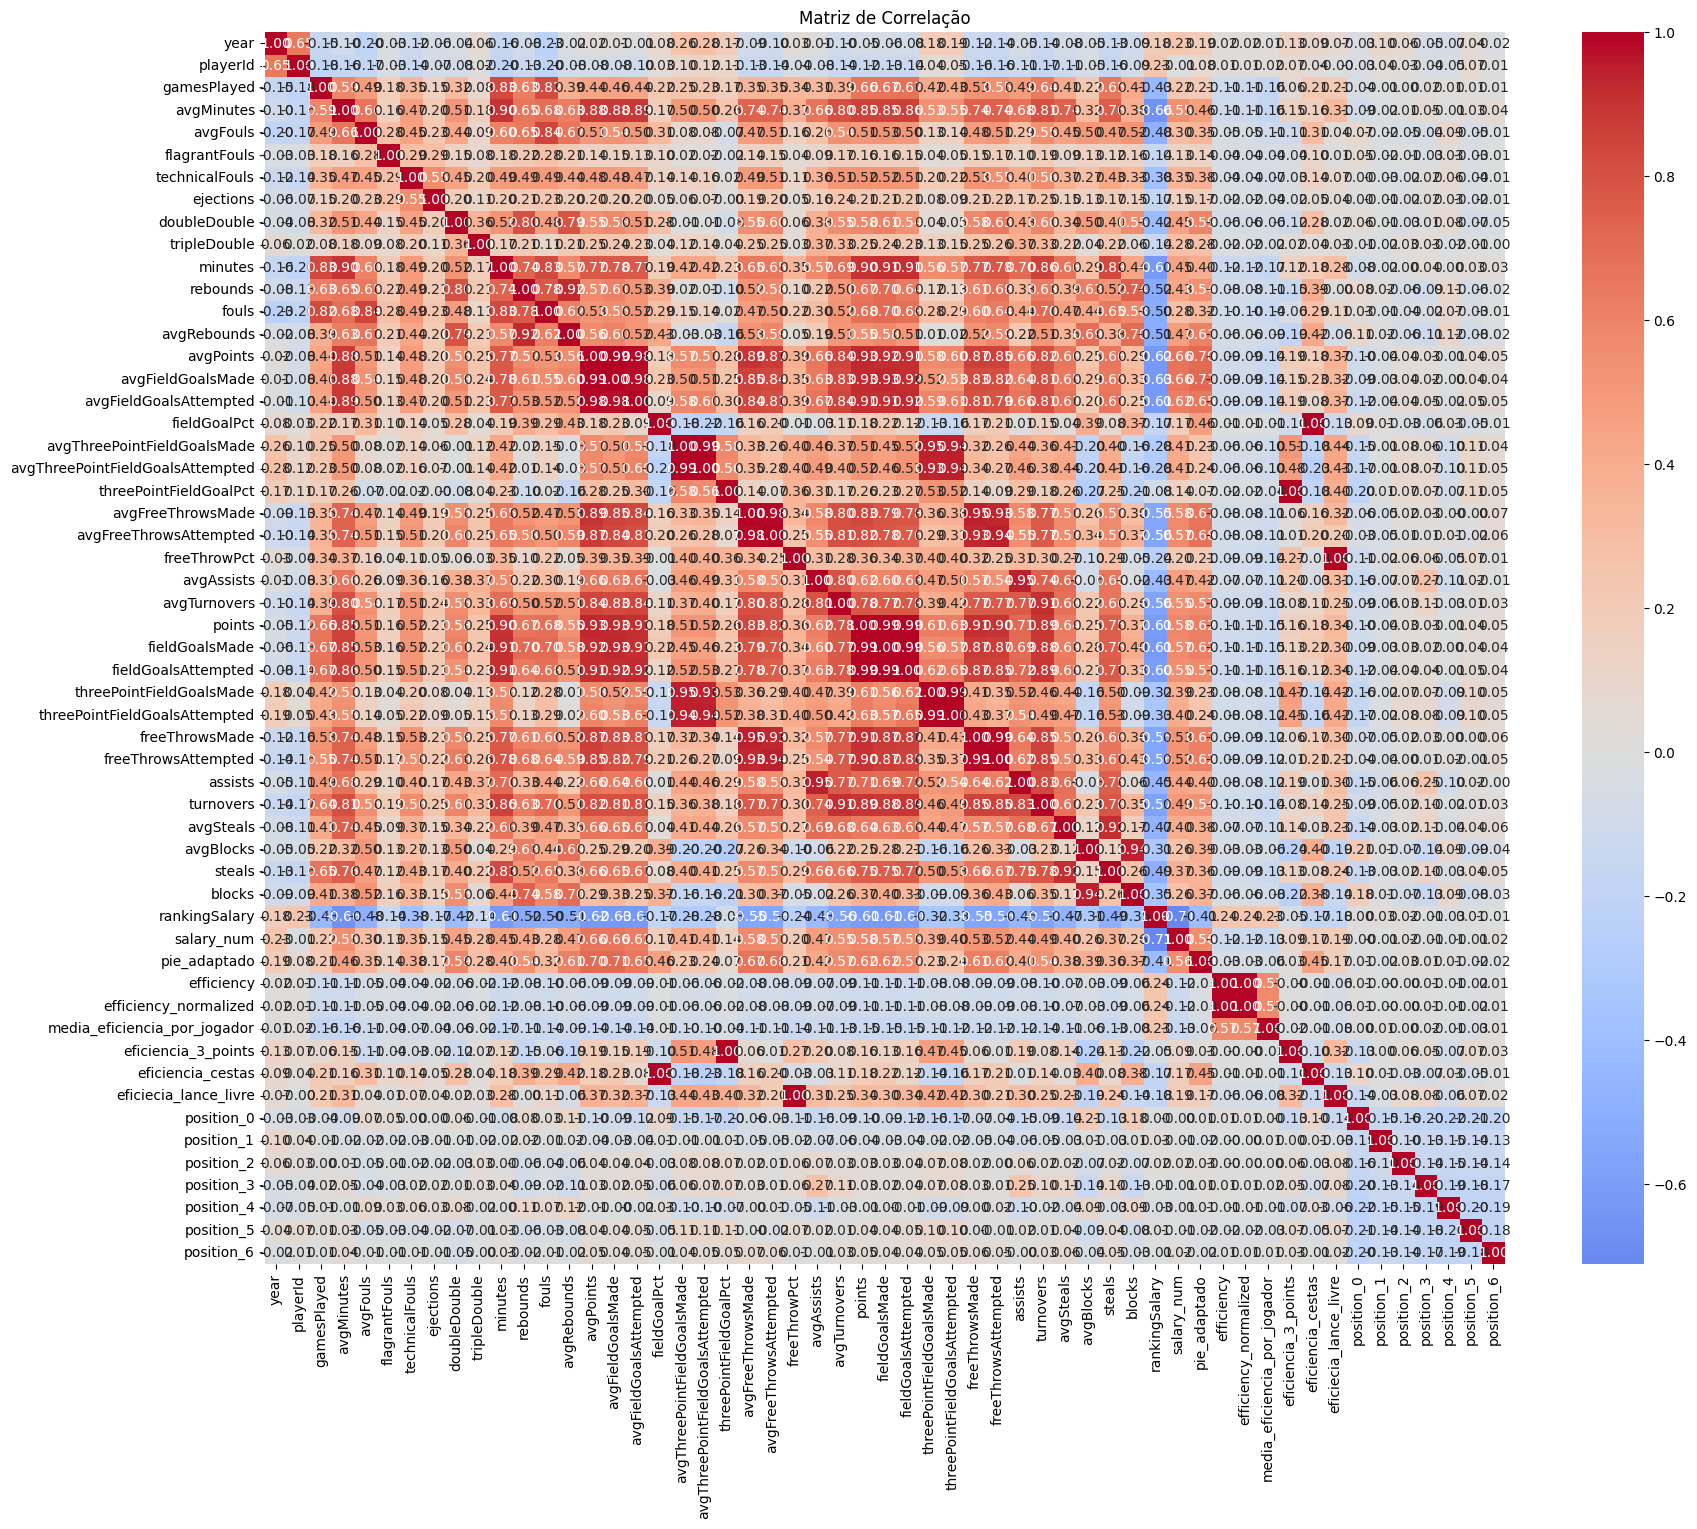

In [36]:
# Selecionar apenas as colunas numéricas para a matriz de correlação
colunas_numericas = df.select_dtypes(include=["float64", "int64"]).columns

# Calcular a matriz de correlação
matriz_correlacao = df[colunas_numericas].corr()

# Plotar a matriz de correlação usando um heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()

In [37]:
matriz_correlacao['salary_num'].sort_values(ascending=False)

salary_num                          1.000000
avgPoints                           0.663635
avgFieldGoalsMade                   0.655173
avgFieldGoalsAttempted              0.624339
points                              0.583960
avgFreeThrowsMade                   0.578652
fieldGoalsMade                      0.574705
avgFreeThrowsAttempted              0.570025
pie_adaptado                        0.557632
avgTurnovers                        0.547630
avgMinutes                          0.547358
fieldGoalsAttempted                 0.547262
freeThrowsMade                      0.530109
freeThrowsAttempted                 0.521905
turnovers                           0.493782
avgAssists                          0.474720
avgRebounds                         0.470505
doubleDouble                        0.451771
minutes                             0.445964
assists                             0.440045
rebounds                            0.432902
avgThreePointFieldGoalsAttempted    0.414703
avgThreePo

<ipython-input-38-b93b6a25db4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_com_supervalorizado = df.corrwith(df["salary_num"])


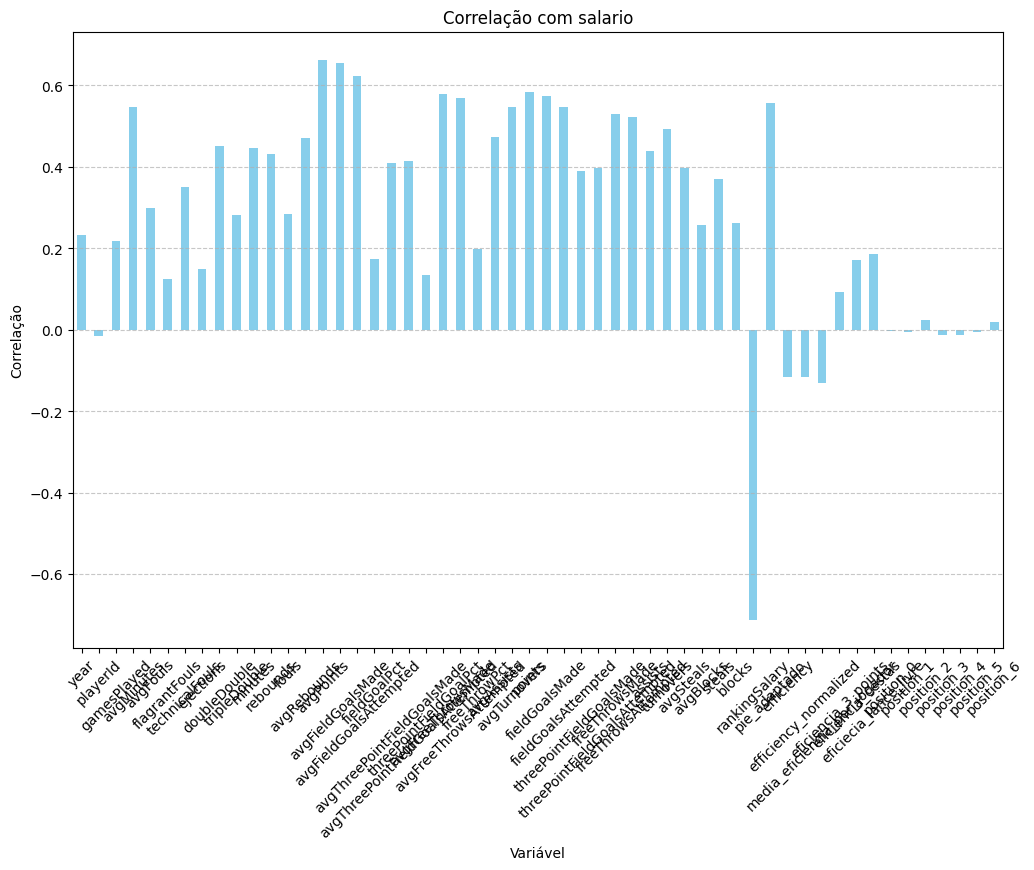

In [38]:
# Calcular a correlação entre 'supervalorizado' e outras variáveis numéricas
correlacao_com_supervalorizado = df.corrwith(df["salary_num"])

# Filtrar apenas as variáveis numéricas (excluindo 'supervalorizado')
correlacao_com_supervalorizado = correlacao_com_supervalorizado.drop(
    "salary_num"
)

# Plotar a correlação
plt.figure(figsize=(12, 8))
correlacao_com_supervalorizado.plot(kind="bar", color="skyblue")
plt.title("Correlação com salario")
plt.xlabel("Variável")
plt.ylabel("Correlação")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Selecionando as Features

In [39]:
# Contar a quantidade de NaN na coluna 'positionId'
count_nan_positionId = df['salary_num'].isna().sum()
print("Quantidade de NaN na coluna 'salary_num':", count_nan_positionId)

Quantidade de NaN na coluna 'salary_num': 7


In [40]:
# Remover linhas onde 'positionId' é NaN
df.dropna(subset=['salary_num'], inplace=True)

In [41]:
# Selecionar apenas as colunas relevantes (float ou integer)
features = df.select_dtypes(include=["float64", "int64"]).columns
# Remover a coluna 'supervalorizado' das features
features = features.drop("salary_num")
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify = df['position']
)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6524 entries, 2141 to 3319
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              6524 non-null   float64
 1   playerId                          6524 non-null   float64
 2   gamesPlayed                       6524 non-null   float64
 3   avgMinutes                        6524 non-null   float64
 4   avgFouls                          6524 non-null   float64
 5   flagrantFouls                     6524 non-null   float64
 6   technicalFouls                    6524 non-null   float64
 7   ejections                         6524 non-null   float64
 8   doubleDouble                      6524 non-null   float64
 9   tripleDouble                      6524 non-null   float64
 10  minutes                           6524 non-null   float64
 11  rebounds                          6524 non-null   float64
 12  fou

In [42]:
# Filtrar as features com correlação acima de 0.5 em relação a 'salary_num'
features_correlacionadas = matriz_correlacao['salary_num'][abs(matriz_correlacao['salary_num']) > 0.5].index

# Selecionar apenas as colunas relevantes (float ou integer) e que têm correlação acima de 0.5
features = df[features_correlacionadas].select_dtypes(include=['float64', 'int64']).columns

# Remover a coluna 'salary_num' das features
features = features.drop('salary_num')

# Adicionar a coluna 'player_id' às features
features = features.append(pd.Index(['playerId']))

# Verificar as features selecionadas
print("Features selecionadas:")
print(features)


Features selecionadas:
Index(['avgMinutes', 'avgPoints', 'avgFieldGoalsMade',
       'avgFieldGoalsAttempted', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'avgTurnovers', 'points', 'fieldGoalsMade', 'fieldGoalsAttempted',
       'freeThrowsMade', 'freeThrowsAttempted', 'rankingSalary',
       'pie_adaptado', 'playerId'],
      dtype='object')


# Modelo de Regressão Linear

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Separar as features e o alvo
X = df[features]
y = df["salary_num"].copy()

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Calculando as previsões
y_pred = model.predict(X_test)
residuos = y_test - y_pred

# Adicionando os resíduos ao DataFrame X_test
X_test["residuos"] = residuos

# Calcular o Root Mean Squared Error (RMSE) em milhões
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular o R2 manualmente
r2_linear_regression = r2_score(y_test, y_pred)

# Calcular o R2 usando validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Usaremos 5-fold cross-validation
r2_cross_val = np.mean(cv_scores)

# Plotar o gráfico de dispersão com Plotly
fig = px.scatter(
    x=y_pred,
    y=residuos,
    title="Gráfico de Dispersão dos Resíduos",
)
fig.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred),
            x1=max(y_pred),
            line=dict(color="red", width=2),
        )
    ]
)
fig.show()


# Random Forest

In [44]:
from sklearn.model_selection import cross_val_score

# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Treinamento do modelo de regressão com Random Forest
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Avaliação do modelo
y_pred = random_forest_regressor.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)

# Calcula o Root Mean Squared Error (RMSE)
rmse_random_forest = np.sqrt(mse_random_forest)

# Calcula os resíduos do modelo Random Forest
residuos_random_forest = y_test - y_pred

# Criando um DataFrame para os dados
residuos_df = pd.DataFrame({"Previsões": y_pred, "Resíduos": residuos_random_forest})

# Calcular o RMSE usando validação cruzada
cv_scores = cross_val_score(random_forest_regressor, X_train, y_train, cv=5)  # Usaremos 5-fold cross-validation
rmse_cv = np.mean(np.sqrt(np.abs(cv_scores)))

# Plotando o gráfico de dispersão com Plotly
fig = px.scatter(
    residuos_df,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos - Random Forest",
)
fig.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred),
            x1=max(y_pred),
            line=dict(color="red", width=2),
        )
    ]
)
fig.show()


# Gradient Boosting

In [45]:
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Treinamento do modelo de regressão com Gradient Boosting
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)

# Avaliação do modelo
y_pred_gradient_boosting = gradient_boosting_regressor.predict(X_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

# Calcula o Root Mean Squared Error (RMSE) para o Gradient Boosting
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)

# Calcula os resíduos do modelo Gradient Boosting
residuos_gradient_boosting = y_test - y_pred_gradient_boosting

# Criando um DataFrame para os dados
residuos_df = pd.DataFrame({"Previsões": y_pred_gradient_boosting, "Resíduos": residuos_gradient_boosting})

# Imprimir o RMSE para o Gradient Boosting
print("Root Mean Squared Error (RMSE) para o Gradient Boosting:", rmse_gradient_boosting)

# Plotando o gráfico de dispersão com Plotly
fig = px.scatter(
    residuos_df,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos",
)
fig.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred_gradient_boosting),
            x1=max(y_pred_gradient_boosting),
            line=dict(color="red", width=2),
        )
    ]
)
fig.show()


Root Mean Squared Error (RMSE) para o Gradient Boosting: 1906284.2343451874


#SVM

In [46]:
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Criando o modelo SVM para regressão
svm_regressor = SVR(kernel='rbf')  # RBF (Radial Basis Function) é uma escolha comum para kernels

# Treinamento do modelo SVM
svm_regressor.fit(X_train, y_train)

# Avaliação do modelo SVM
y_pred_svm = svm_regressor.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Calcula o Root Mean Squared Error (RMSE) para o SVM
rmse_svm = np.sqrt(mse_svm)

# Calcula os resíduos do modelo SVM
residuos_svm = y_test - y_pred_svm

# Criando um DataFrame para os dados do SVM
residuos_df_svm = pd.DataFrame({"Previsões": y_pred_svm, "Resíduos": residuos_svm})

# Imprimir o RMSE para o SVM
print("Root Mean Squared Error (RMSE) para o SVM:", rmse_svm)

# Plotando o gráfico de dispersão com Plotly para o SVM
fig_svm = px.scatter(
    residuos_df_svm,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos - SVM",
)
fig_svm.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred_svm),
            x1=max(y_pred_svm),
            line=dict(color="red", width=2),
        )
    ]
)
fig_svm.show()

Root Mean Squared Error (RMSE) para o SVM: 7697389.5174553385


# KNN

In [47]:
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Criando o modelo KNN para regressão
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Número de vizinhos = 5 (pode ser ajustado)

# Treinamento do modelo KNN
knn_regressor.fit(X_train, y_train)

# Avaliação do modelo KNN
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calcula o Root Mean Squared Error (RMSE) para o KNN
rmse_knn = np.sqrt(mse_knn)

# Calcula os resíduos do modelo KNN
residuos_knn = y_test - y_pred_knn

# Criando um DataFrame para os dados do KNN
residuos_df_knn = pd.DataFrame({"Previsões": y_pred_knn, "Resíduos": residuos_knn})

# Imprimir o RMSE para o KNN
print("Root Mean Squared Error (RMSE) para KNN:", rmse_knn)

# Plotando o gráfico de dispersão com Plotly para o KNN
fig_knn = px.scatter(
    residuos_df_knn,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos - KNN",
)
fig_knn.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred_knn),
            x1=max(y_pred_knn),
            line=dict(color="red", width=2),
        )
    ]
)
fig_knn.show()


Root Mean Squared Error (RMSE) para KNN: 4335675.047672819


# Lasso e Ridge Regression:

In [48]:
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Lasso Regression
lasso_regressor = Lasso(alpha=0.01)  # Alpha pode ser ajustado
lasso_regressor.fit(X_train, y_train)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)  # Alpha pode ser ajustado
ridge_regressor.fit(X_train, y_train)

# Avaliação do modelo Lasso
y_pred_lasso = lasso_regressor.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calcula o Root Mean Squared Error (RMSE) para o Lasso
rmse_lasso = np.sqrt(mse_lasso)

# Calcula os resíduos do modelo Lasso
residuos_lasso = y_test - y_pred_lasso

# Criando um DataFrame para os dados do Lasso
residuos_df_lasso = pd.DataFrame({"Previsões": y_pred_lasso, "Resíduos": residuos_lasso})

# Imprimir o RMSE para o Lasso
print("Root Mean Squared Error (RMSE) para Lasso:", rmse_lasso)

# Plotando o gráfico de dispersão com Plotly para o Lasso
fig_lasso = px.scatter(
    residuos_df_lasso,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos - Lasso",
)
fig_lasso.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred_lasso),
            x1=max(y_pred_lasso),
            line=dict(color="red", width=2),
        )
    ]
)
fig_lasso.show()



Root Mean Squared Error (RMSE) para Lasso: 4014761.9803545712


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.240e+16, tolerance: 3.226e+13



# XGBoost

In [49]:
# Separar as features e o alvo
X = df[features]
y = df["salary_num"]

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Criando o modelo XGBoost para regressão
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Treinamento do modelo XGBoost
xgboost_regressor.fit(X_train, y_train)

# Avaliação do modelo XGBoost
y_pred_xgboost = xgboost_regressor.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Calcula o Root Mean Squared Error (RMSE) para o XGBoost
rmse_xgboost = np.sqrt(mse_xgboost)

# Calcula os resíduos do modelo XGBoost
residuos_xgboost = y_test - y_pred_xgboost

# Criando um DataFrame para os dados do XGBoost
residuos_df_xgboost = pd.DataFrame({"Previsões": y_pred_xgboost, "Resíduos": residuos_xgboost})


# Plotando o gráfico de dispersão com Plotly para o XGBoost
fig_xgboost = px.scatter(
    residuos_df_xgboost,
    x="Previsões",
    y="Resíduos",
    title="Gráfico de Dispersão dos Resíduos - XGBoost",
)
fig_xgboost.update_layout(
    shapes=[
        dict(
            type="line",
            y0=0,
            y1=0,
            x0=min(y_pred_xgboost),
            x1=max(y_pred_xgboost),
            line=dict(color="red", width=2),
        )
    ]
)
fig_xgboost.show()

# Comparando os Modelos

In [50]:
# Criar um DataFrame com os resultados dos modelos
resultados = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Lasso', 'XGBoost'],
    'RMSE': [rmse_linear_regression, rmse_random_forest, rmse_gradient_boosting, rmse_svm, rmse_knn, rmse_lasso, rmse_xgboost],
    'R2': [r2_linear_regression, r2_random_forest, r2_gradient_boosting, r2_svm, r2_knn, r2_lasso, r2_xgboost]
})

# Converter os valores de RMSE para milhões
resultados['RMSE (Milhões)'] = resultados['RMSE'] / 1e6

# Criar um DataFrame com os resultados ajustados
resultados_ajustados = resultados.drop(columns=['RMSE'])

# Ordenar os resultados pelo maior R2 e menor RMSE
resultados_ordenados = resultados_ajustados.sort_values(by=['R2', 'RMSE (Milhões)'], ascending=[False, True])

# Imprimir os resultados ordenados
print("Resultados dos Modelos (Ordenados):")
print(resultados_ordenados)

Resultados dos Modelos (Ordenados):
              Modelo        R2  RMSE (Milhões)
6            XGBoost  0.939111        1.768149
1      Random Forest  0.938054        1.783423
2  Gradient Boosting  0.929225        1.906284
0  Linear Regression  0.686263        4.013583
5              Lasso  0.686078        4.014762
4                KNN  0.633887        4.335675
3                SVM -0.153955        7.697390


# Explorando o Modelo

In [51]:
df_nba = df.copy()
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['position']
)

# Criar o modelo XGBoost para regressão
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Treinamento do modelo XGBoost
xgboost_regressor.fit(X_train, y_train)

# Avaliação do modelo XGBoost
y_pred_xgboost = xgboost_regressor.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
# Criar uma nova coluna 'salary_predict' no DataFrame df_nba
df_nba['salary_predict'] = xgboost_regressor.predict(X)
df_nba['residuo'] = df_nba['salary_num'] - df_nba['salary_predict']
df_nba['media_diferenca_residuo'] = df_nba.groupby('playerId')['residuo'].transform('mean')
df_nba = df_nba.sort_values(by=['residuo'], ascending=False)
df_nba[['year','name','position','salary_num','salary_predict','residuo','media_diferenca_residuo']].head(10)

year               name        position  salary_num  salary_predict  \
4900  2023.0       James Harden  Shooting Guard  35640000.0      18945920.0   
4135  2019.0        Mike Conley     Point Guard  32511624.0      19865412.0   
5232  2023.0        Paul George         Forward  45640084.0      33938840.0   
4075  2019.0       Kevin Durant   Power Forward  38199000.0      27568280.0   
4793  2022.0      Stephen Curry     Point Guard  48070014.0      38175200.0   
4886  2023.0       Jrue Holiday     Point Guard  36861707.0      27695780.0   
6334  2022.0     Andrew Wiggins   Small Forward  33616770.0      24819922.0   
4569  2017.0      Nicolas Batum   Power Forward  24000000.0      15453330.0   
6388  2023.0        Zach LaVine  Shooting Guard  40064220.0      32085456.0   
3827  2020.0  LaMarcus Aldridge          Center  24000000.0      16080303.0   

         residuo  media_diferenca_residuo  
4900  16694080.0             1.108666e+06  
4135  12646212.0             1.214432e+06  
5232  11701244.0             1.000501e+06  
4075  10630720.0             1.548048e+06  
4793   9894814.0             1.030014e+06  
4886   9165927.0             6.979925e+05  
6334   8796848.0             1.012649e+06  
4569   8546670.0             2.023537e+05  
6388   7978764.0             1.172596e+06  
3827   7919697.0             4.977463e+05

In [52]:
# Reordenar o DataFrame em ordem decrescente pela coluna 'media_diferenca_residuo'
df_nba = df_nba.sort_values(by='media_diferenca_residuo', ascending=False)

# Selecionar apenas um jogador por playerId (o primeiro jogador de cada grupo)
unique_players_df = df_nba.drop_duplicates(subset='playerId')

# Exibir as 10 primeiras entradas
top10_players = unique_players_df[['name', 'position', 'salary_num', 'salary_predict', 'residuo', 'media_diferenca_residuo']].head(10)
top10_players


name        position  salary_num  salary_predict  \
6396  Bojan Bogdanovic   Small Forward  19550000.0     14810762.00   
4070      Kevin Durant   Power Forward  17832627.0     17428766.00   
5620       Ricky Rubio     Point Guard  14275000.0      9878492.00   
4124       Mike Conley     Point Guard   3630480.0      3842878.00   
6383       Zach LaVine  Shooting Guard  19500000.0     19690250.00   
1113    Kenny Anderson     Point Guard   7520000.0      7760693.50   
8006       Evan Mobley   Power Forward   8478720.0      7163357.00   
4895      James Harden  Shooting Guard  30421854.0     30275866.00   
4784     Stephen Curry     Point Guard   3117120.0      3292458.75   
6331    Andrew Wiggins   Small Forward  27504630.0     27506842.00   

         residuo  media_diferenca_residuo  
6396  4739238.00             2.288283e+06  
4070   403861.00             1.548048e+06  
5620  4396508.00             1.496033e+06  
4124  -212398.00             1.214432e+06  
6383  -190250.00             1.172596e+06  
1113  -240693.50             1.119603e+06  
8006  1315363.00             1.117547e+06  
4895   145988.00             1.108666e+06  
4784  -175338.75             1.030014e+06  
6331    -2212.00             1.012649e+06

# Conclusão

Rondo